In [1]:
import pandas as pd 
import sys
sys.path.insert(1, "../src")
import treats_matt

In [2]:
#Requirements:

#Requirements: Two data sources are combined correctly-----
#Any reference to revenue correctly calculates (or identifies) deposits and monthly payments.
#Each participant has at least one commit in the repository for the work completed.
#All participants have access to the repository
#Each participant should construct at least One Visual (minimum, 3 visuals for presentation)
#The final notebook should show the visuals in line with text in the markdown cells articulating:
#What this graph is showing
#Why it is important
#What it means for the business
#Any action items the business should take with this knowlege
#The data work and code to process each step should be in separate .py files
#The final project notebooks should call each (if more than one) .py file to execute the code for each step

#def load_data():
    df_customers = pd.read_csv("/Users/matthavey/Desktop/bip-python-unh/sales_analysis/data/customers.csv")
    df_contracts = pd.read_csv("/Users/matthavey/Desktop/bip-python-unh/sales_analysis/data/contracts.csv")
    return df_customers,  df_contracts

#def combine_data( df_customers,  df_contracts):
    df_customers.rename(columns={'id':'customer_id'}, inplace=True)
    df_customers.set_index('customer_id', inplace=True)
    df_contracts.set_index('customer_id', inplace=True)
    df = df_contracts.join(df_customers, how='left')
    return df

In [3]:
#Visuals that we will need are:  Sales by state, Sales by industry/sector, Sales by customer

In [4]:
df_customers,  df_contracts = treats_matt.load_data()
df_customers.head()
df_contracts.head()

,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt
0,1,127,8/17/2019,12,"$53,000.00","$11,600.00"
1,2,119,12/1/2019,22,"$77,000.00","$14,600.00"
2,3,160,5/1/2019,15,"$13,000.00","$22,800.00"
3,4,7,12/8/2019,23,"$56,000.00","$11,400.00"
4,5,144,2/11/2019,7,"$21,000.00","$19,800.00"


In [5]:
df = treats_matt.combine_data(df_customers, df_contracts)
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,5/31/2019,24,"$86,000.00","$11,200.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,6/18/2019,13,"$74,000.00","$19,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,8/11/2019,19,"$38,000.00","$8,800.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,3/13/2019,15,"$77,000.00","$14,300.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,10/16/2019,22,"$39,000.00","$20,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#plt.bar(State, Revenue)
#plt.title(‘Revenue by State’)
#plt.xlabel(‘State’)
#plt.ylabel(‘Revenue in Dollars’)
#plt.show()

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

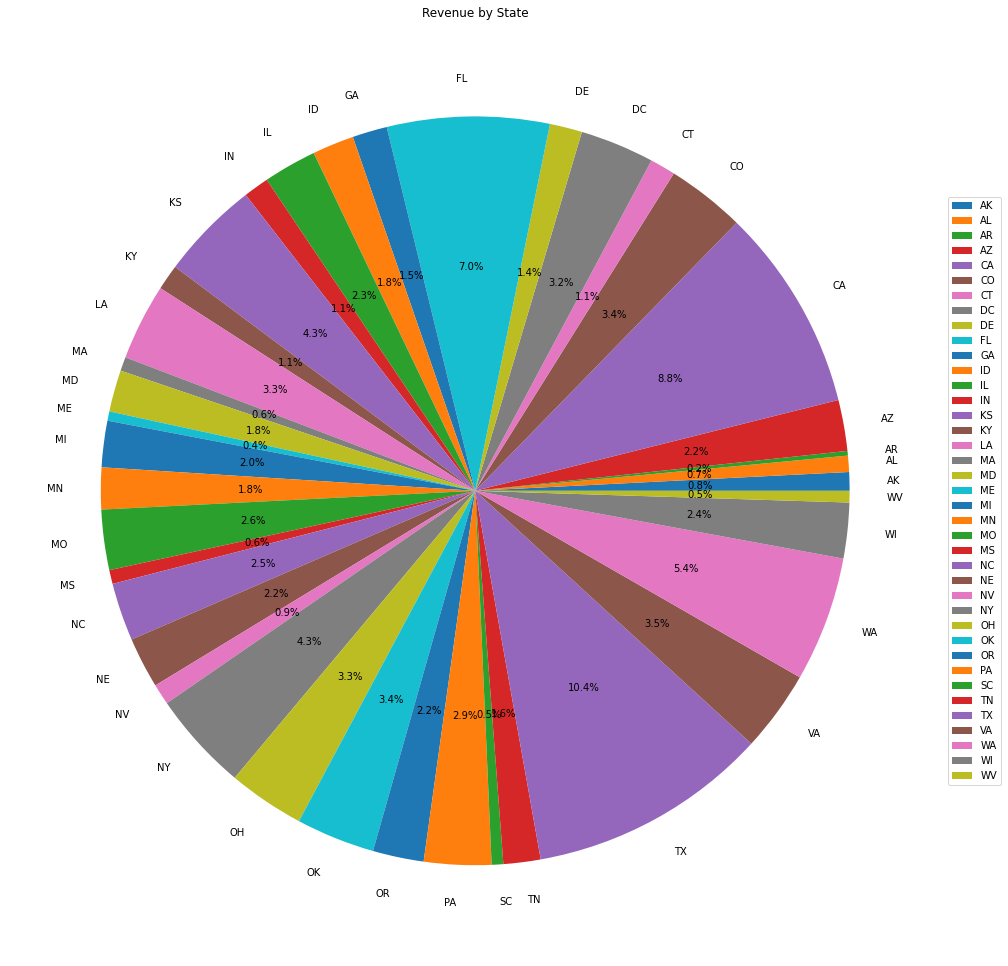

In [10]:
fig=plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
a = df.groupby('state').state.count()
b = df.state.unique()
ax.pie(a, labels=a.keys(), autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(13,13) 
plt.title('Revenue by State')
plt.legend(b,loc='upper left',borderpad=0.00001)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
bbox_to_anchor=(0.5,0.90)
plt.show()

In [ ]:
#This plot shows how revenue 

In [11]:
df['sale'] = pd.Series(df['deposit']+df['monthly_amt']*df['contract_term'])
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip,sale
customer_id,,,,,,,,,,,,,,
1,41,5/31/2019,24,"$86,000.00","$11,200.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,"$86,000.00$11,200.00$11,200.00$11,200.00$11,20..."
1,358,6/18/2019,13,"$74,000.00","$19,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,"$74,000.00$19,000.00$19,000.00$19,000.00$19,00..."
1,400,8/11/2019,19,"$38,000.00","$8,800.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,"$38,000.00$8,800.00$8,800.00$8,800.00$8,800.00..."
1,424,3/13/2019,15,"$77,000.00","$14,300.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,"$77,000.00$14,300.00$14,300.00$14,300.00$14,30..."
1,438,10/16/2019,22,"$39,000.00","$20,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,"$39,000.00$20,000.00$20,000.00$20,000.00$20,00..."
